In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report, confusion_matrix,\
                            plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score


#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
data = pd.read_csv(r'C:\Users\pnish\OneDrive\Documents\Projects\data\indian_liver_patient.csv')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**4 rows in the Albumin_and_Globulin_Ratio column have null values. Will be working on imputing these NaNs later in the code below after some research and understandng the data more.**

In [5]:
data[data.Albumin_and_Globulin_Ratio.isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [6]:
#Changing the Data type of the repsonse variable to category, giving a more intuitive columnn name and coding the responses.
#Not a Liver Patient - 0
#Liver Patient - 1
data['Dataset'] = data['Dataset'].astype('category')
data.rename(columns = {'Dataset':'Liver_Patient'},inplace=True)
data['Liver_Patient'].replace({2:0},inplace=True)

In [7]:
data.Liver_Patient.value_counts()

1    416
0    167
Name: Liver_Patient, dtype: int64

**It can be seen that the dataset is imbalanced. This needs to be addressed during data preprocesssing and model building phases**

In [8]:
#Coding the Gender column
#Female - 0
#Male - 1
data['Gender'].replace({'Female':0,'Male':1},inplace=True)
data.Gender.value_counts()

1    441
0    142
Name: Gender, dtype: int64

## EDA

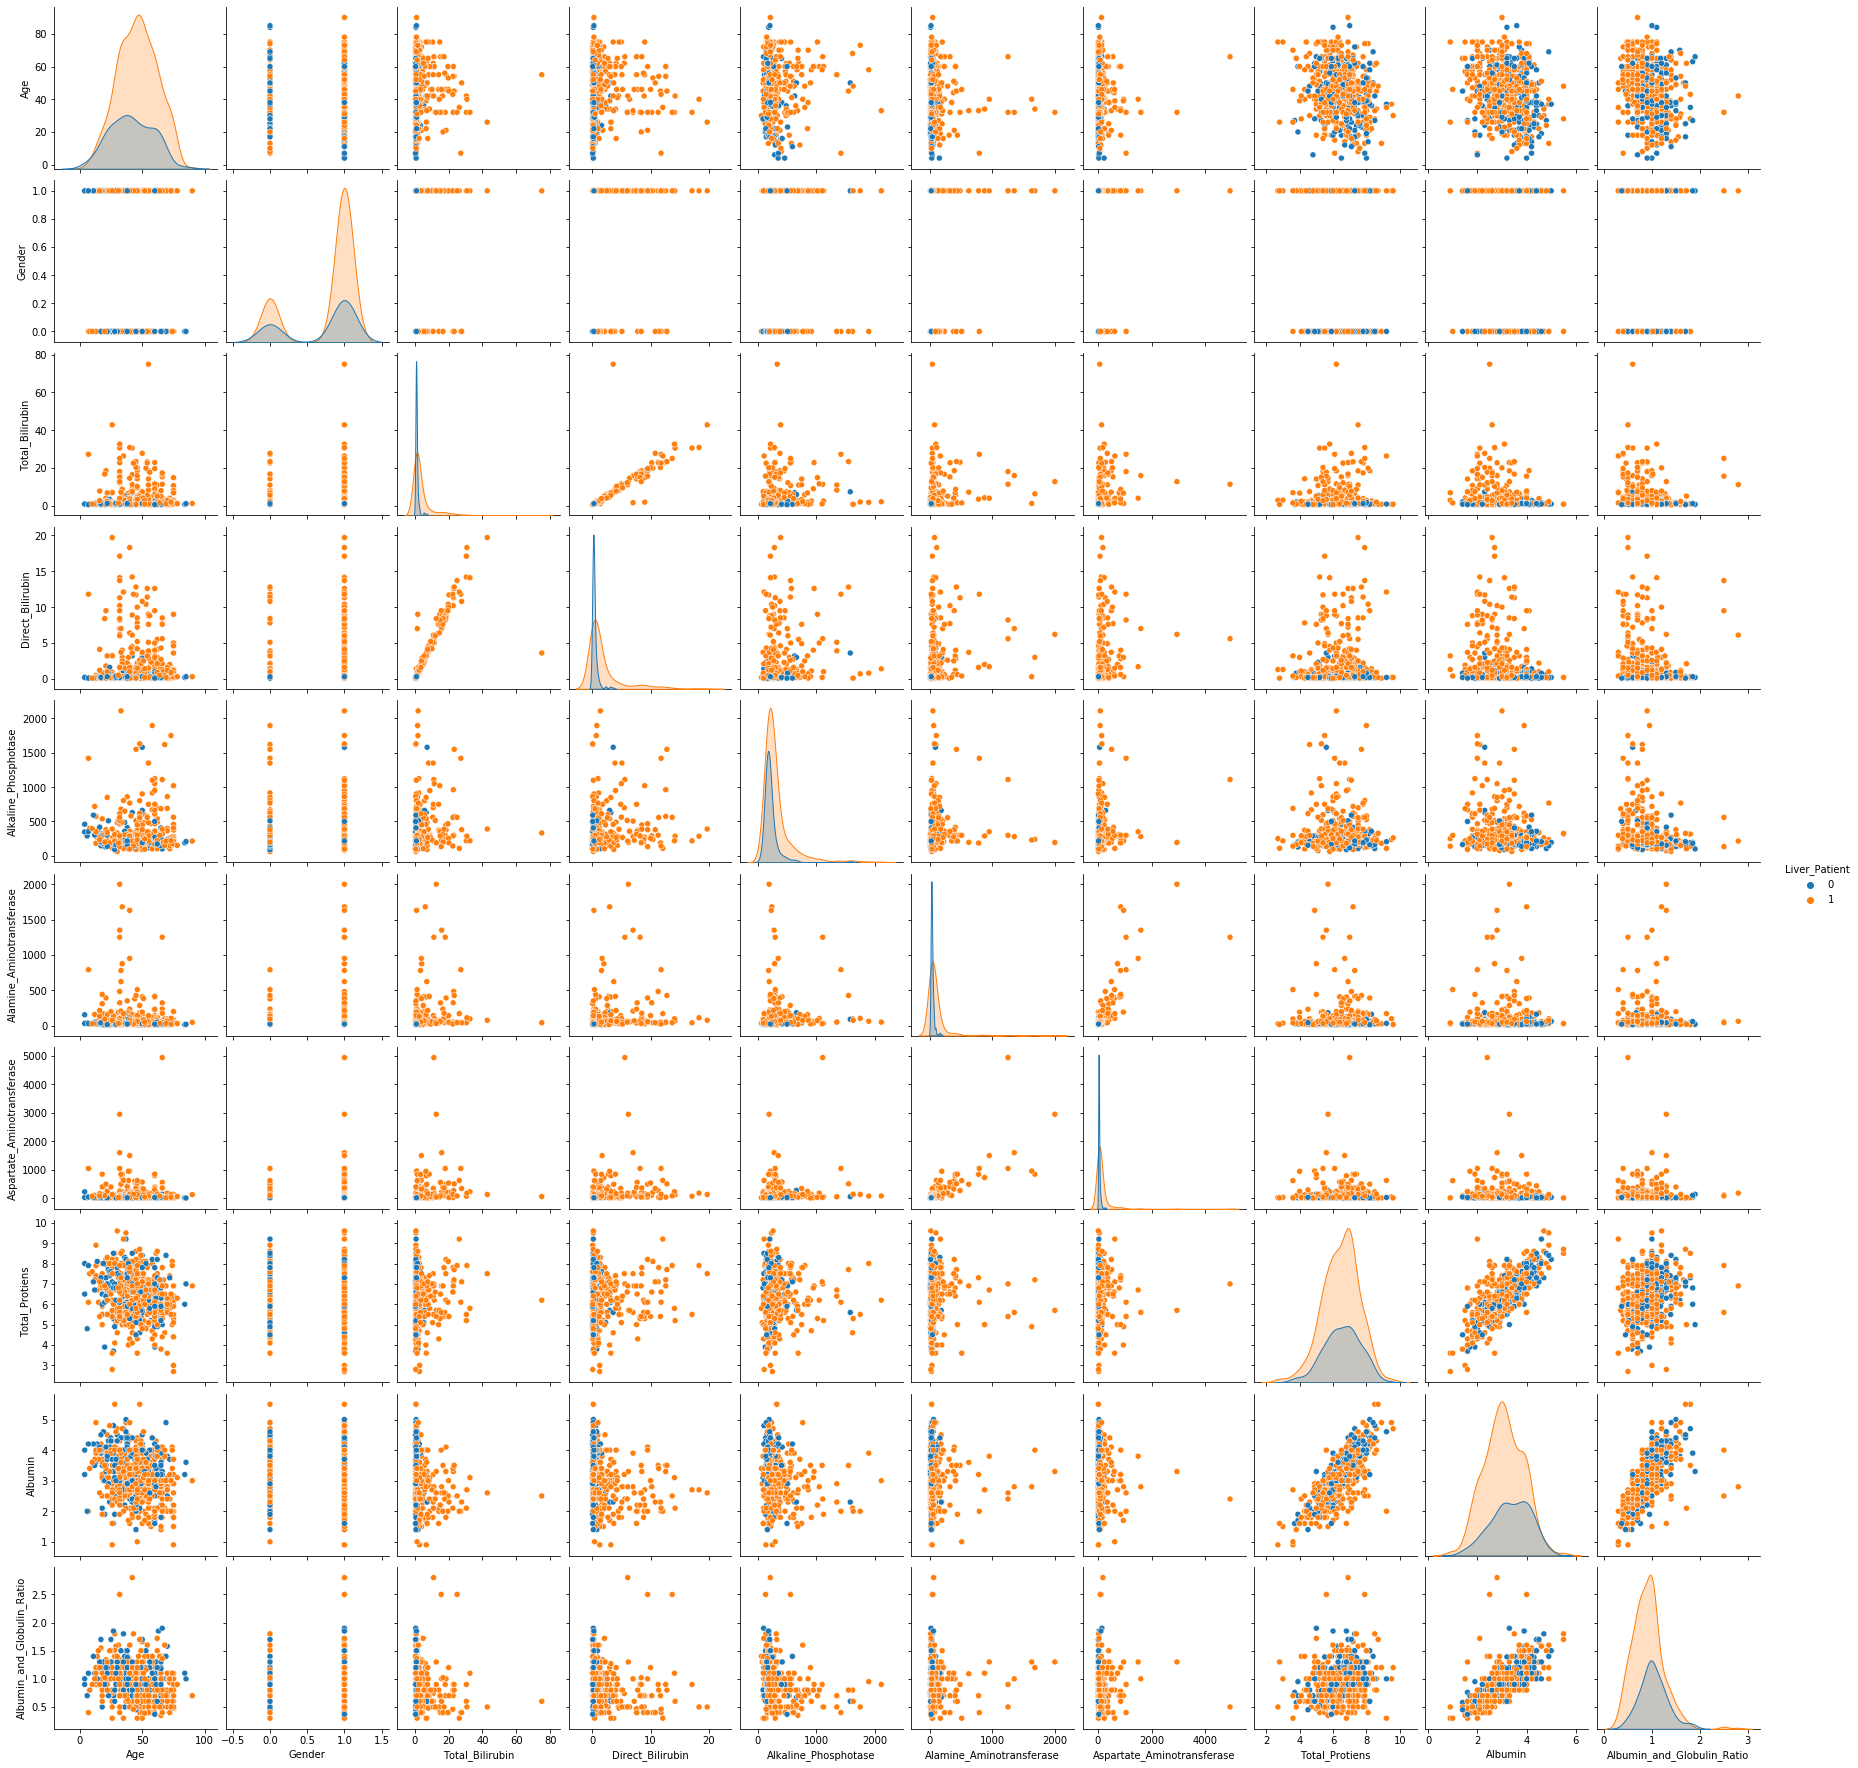

In [9]:
#Plot to see the relationship between features
sns.pairplot(data=data, diag_kind='kde', hue="Liver_Patient")

* Some independent variables are not normally distributed. After some research (https://www.researchgate.net/post/Should_I_transform_non-normal_independent_variables_in_logistic_regression), found that the normal distribution for predictor variables is not a must for many models unless it is the assumption of the model.
* Some features are correlated with others.

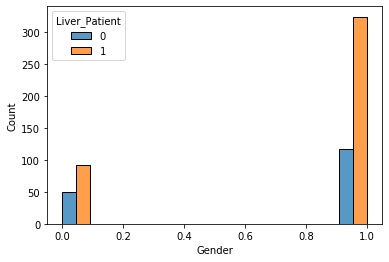

In [10]:
#Distribution of Gender and response
sns.histplot(data = data,x='Gender',hue='Liver_Patient',multiple='dodge')

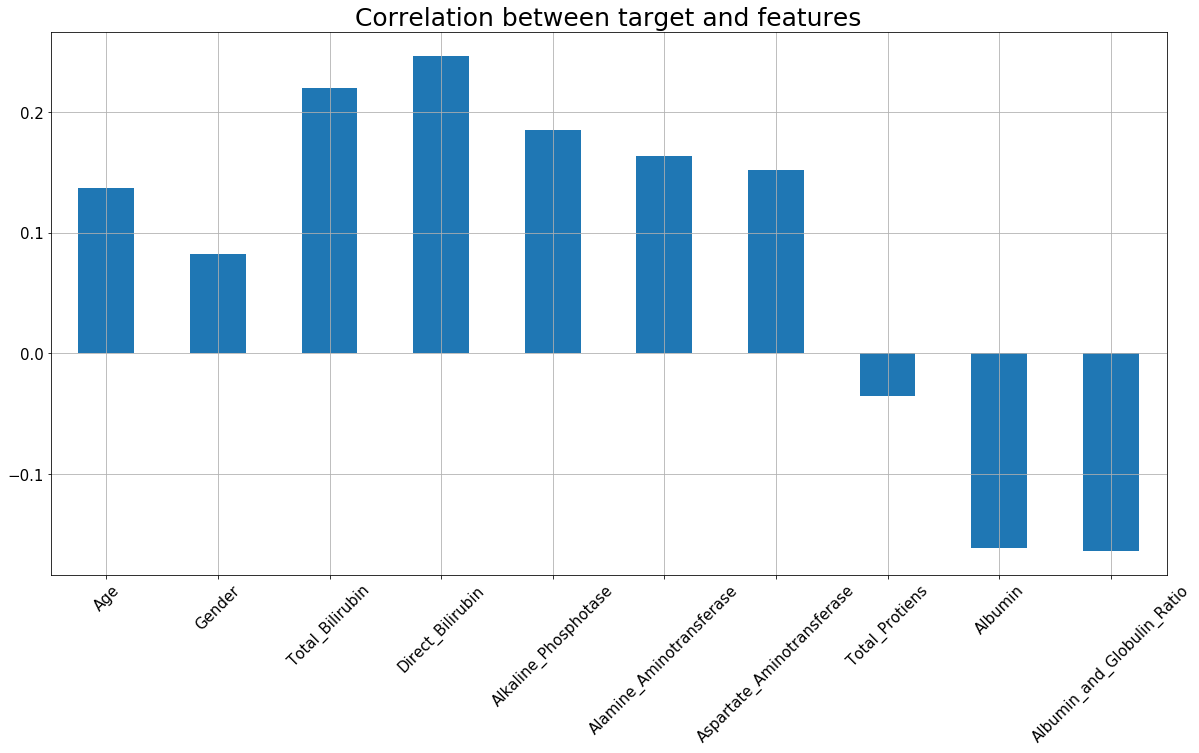

In [11]:
#Correlation plot between features and target
plt.title('Correlation between target and features',fontsize=25)
data.drop(columns='Liver_Patient').corrwith(data['Liver_Patient']).plot.bar(figsize = (20,10),fontsize=15,rot=45,grid=True)

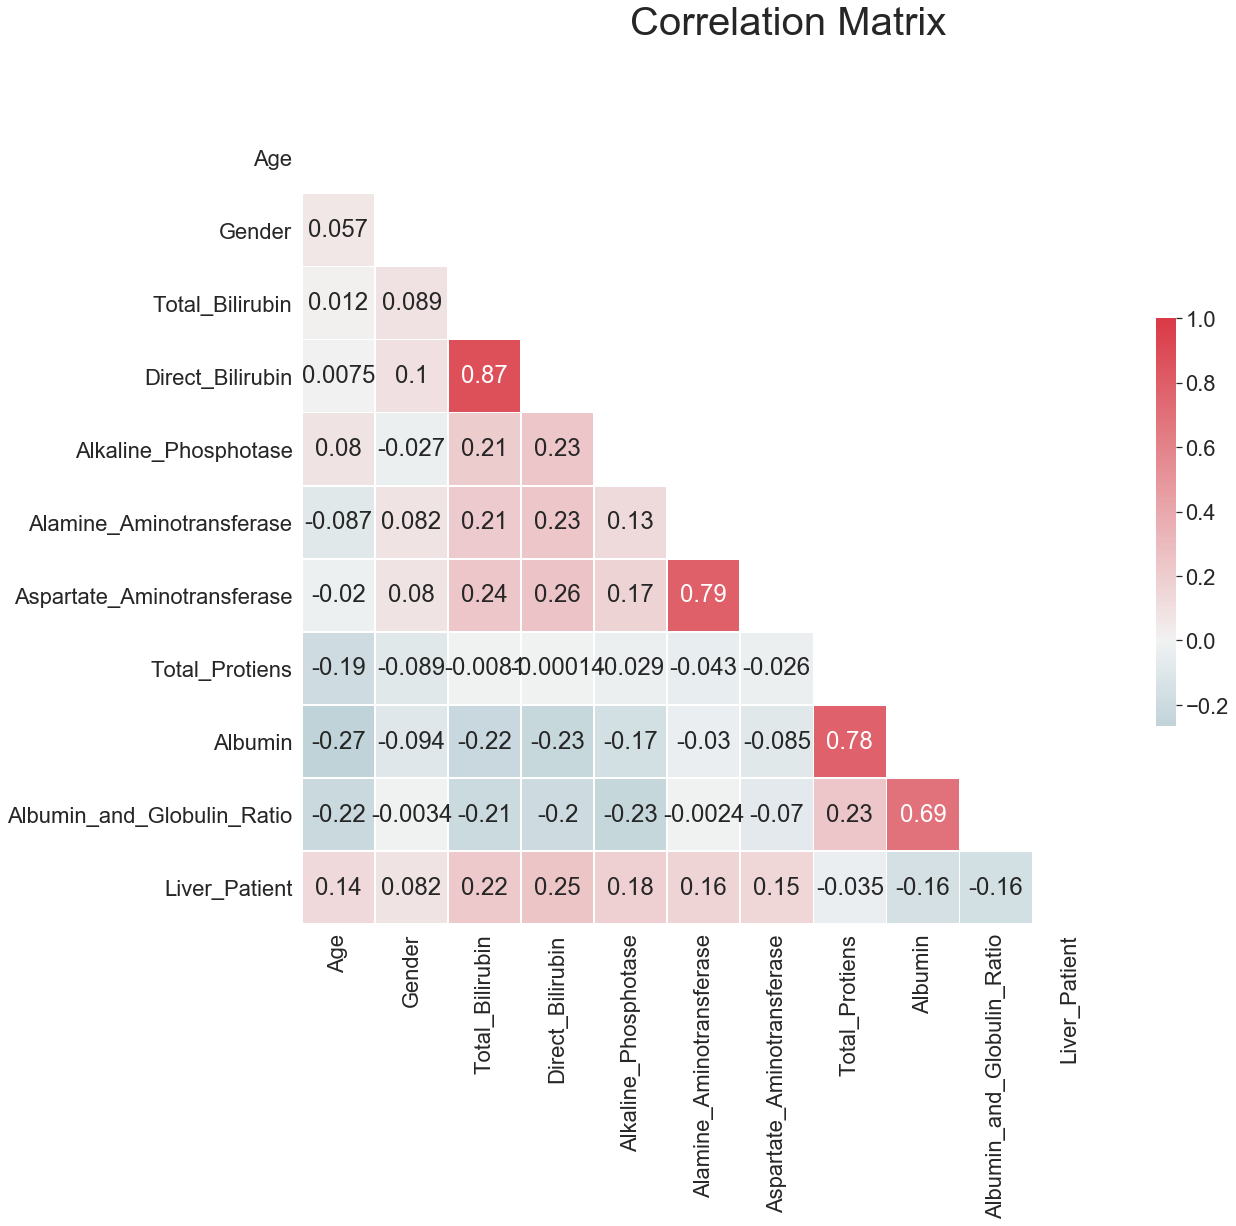

In [12]:
#Correlation Matrix between all features
sns.set(style='white',font_scale=2)
corr = data.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix",fontsize = 40)
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask= mask,cmap=cmap, vmax=1,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5},annot=True)

A high correlation can be seen between 4 pairs of predictors :
1. Total Bilirubin and Direct Bilirubin.
2. Aspartate Aminotransferase and Alamine Aminotransferase
3. Albumin and Total Proteins
4. Albumin and Albumin-Globulin Ratio<br>

These correlations need further analysis and should be addressed with proper explanations. <br> 

### Research and analysis for the of correlations mentioned above
* Bilirubin is an orange-yellow pigment, a waste product primarily produced by the normal breakdown of heme. Direct or Conjugated Bilirubin is a type of Bilirubin (Direct and Indirect). **Normally, the level of conjugated bilirubin in the blood is very low.** For further read : https://labtestsonline.org/tests/bilirubin <br><br>

* Aspartate aminotransferase (AST) is an enzyme found in cells throughout the body but mostly in the heart and liver. **In healthy individuals, levels of AST in the blood are low.** When liver or muscle cells are injured, they release AST into the blood and increases its level. An AST test is often performed along with an alanine aminotransferase (ALT) test. **Both are enzymes found in the liver that become elevated in the blood when the liver is damaged.** A calculated AST/ALT ratio is useful for differentiating between different causes of liver injury and in recognizing when the increased levels may be coming from another source, such as heart or muscle injury. For further reading : https://labtestsonline.org/tests/aspartate-aminotransferase-ast#:~:text=Aspartate%20aminotransferase%20(AST)%20is%20an,release%20AST%20into%20the%20blood. <br><br>

* Albumin is a protein made by your liver and makes up about 60% of the total protein. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. It is also carries various substances throughout your body, including hormones, vitamins, and enzymes. **Low albumin levels can indicate a problem with your liver or kidneys.** For futher reading : https://medlineplus.gov/lab-tests/albumin-blood-test/<br><br>

* Globulins make up the remaining 40% of proteins in the blood. The globulins are a varied group of proteins, some produced by the liver and some by the immune system. They help fight infection and transport nutrients. **A/G ratio can provide your healthcare practitioner with a clue as to the cause of the change in protein levels.** For further read : https://labtestsonline.org/tests/total-protein-albumin-globulin-ag-ratio

### Conclusions from research to handle correlations
1. Total Bilirubin can be removed since the liver failure mainly depends on the Direct Bilirubin
2. AST and ALT can be substituted with AST/ALT ratio which would give the entire information
3. Albumin can be removed since Total Proteins and A/G ratio features together would account for the information about the Albumin.

## Feature Engineering

#### 1. Imputing NaNs

Previously it was found that 4 rows had null values for Albumin_and_Globulin_Ratio. Now with the knowledge of relationship among Total Protein, Albumin and Albumin_and_Globulin_Ratio, those 4 values can be calculated.

In [13]:
data[data.Albumin_and_Globulin_Ratio.isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Patient
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [14]:
#Imputing
idx = data[data.Albumin_and_Globulin_Ratio.isna()].index
AGratio = data.Albumin/(data.Total_Protiens-data.Albumin)
data.Albumin_and_Globulin_Ratio.fillna(round(AGratio,2),inplace=True)
data.loc[idx,:]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Patient
209,45,0,0.9,0.3,189,23,33,6.6,3.9,1.44,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,0.91,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,1.08,0
312,27,1,1.3,0.6,106,25,54,8.5,4.8,1.30,0


In [15]:
data_x = data.drop(columns='Liver_Patient')
data_y = data['Liver_Patient']

#### 2. Removing correlated columns

In [16]:
#Removing Total Bilirubin and Albumin to avoid correlations according to the results obtained from the research
data_x = data_x.drop(columns = ['Total_Bilirubin','Albumin'])

In [17]:
#Replacing AST and ALT by AST/ALT ratio
data_x['AST_ALT_ratio'] = data_x.Aspartate_Aminotransferase/data_x.Alamine_Aminotransferase
data_x = data_x.drop(columns = ['Aspartate_Aminotransferase','Alamine_Aminotransferase'])
data_x

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens,Albumin_and_Globulin_Ratio,AST_ALT_ratio
0,65,0,0.1,187,6.8,0.90,1.125000
1,62,1,5.5,699,7.5,0.74,1.562500
2,62,1,4.1,490,7.0,0.89,1.133333
3,58,1,0.4,182,6.8,1.00,1.428571
4,72,1,2.0,195,7.3,0.40,2.185185
...,...,...,...,...,...,...,...
578,60,1,0.1,500,5.9,0.37,1.700000
579,40,1,0.1,98,6.0,1.10,0.885714
580,52,1,0.2,245,6.4,1.00,1.020833
581,31,1,0.5,184,6.8,1.00,1.103448


### Train test split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.2, random_state=42, stratify = data_y)

### Scaling

In [19]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)

## Initial Prediction

The Testing Balanced accuracy score is :  0.48458540042523035
              precision    recall  f1-score   support

           0       0.17      0.03      0.05        34
           1       0.70      0.94      0.80        83

    accuracy                           0.68       117
   macro avg       0.43      0.48      0.43       117
weighted avg       0.55      0.68      0.58       117



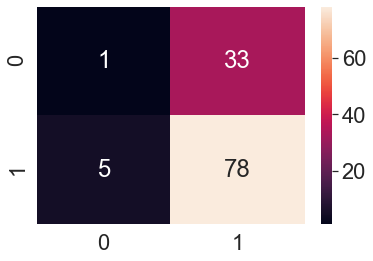

In [20]:
logit = LogisticRegression()
logit.fit(X_train,y_train)
y_pred = logit.predict(X_test)
print("The Testing Balanced accuracy score is : ",balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**The result obtained is very poor due to the imbalance in the data. A method to handle imbalanced should be implemented.**

## UPSAMPLING
### Upsampling only the training data to avoid bias in the test data
Rules:
* Import the data
* Replace 'None' with NaN
* Split into X and y
* Split into training and testing sets
* Scaling (fit on xtrain; transform on xtrain, xtest, & unlabeled)
* Imputing (fit on xtrain; transform on xtrain, xtest, & unlabeled)
* Downsampling/upsampling on X_train and y_train

Suggestions:
* Don't take cross validation BER into account, use x_test BER instead

In [21]:
data2 = data_x.merge(data_y, left_index = True, right_index=True)
data2

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens,Albumin_and_Globulin_Ratio,AST_ALT_ratio,Liver_Patient
0,65,0,0.1,187,6.8,0.90,1.125000,1
1,62,1,5.5,699,7.5,0.74,1.562500,1
2,62,1,4.1,490,7.0,0.89,1.133333,1
3,58,1,0.4,182,6.8,1.00,1.428571,1
4,72,1,2.0,195,7.3,0.40,2.185185,1
...,...,...,...,...,...,...,...,...
578,60,1,0.1,500,5.9,0.37,1.700000,0
579,40,1,0.1,98,6.0,1.10,0.885714,1
580,52,1,0.2,245,6.4,1.00,1.020833,1
581,31,1,0.5,184,6.8,1.00,1.103448,1


### Train test split

In [22]:
df_train,df_test = train_test_split(data2,test_size=0.2, random_state=42)

### Scaling

In [23]:
sc = StandardScaler()
df_train.iloc[:,:-1] = sc.fit_transform(df_train.iloc[:,:-1])
df_test.iloc[:,:-1] = sc.transform(df_test.iloc[:,:-1])

In [24]:
#UPSAMPLING only the training data
# Separate majority and minority classes
y_0 = df_train[df_train.Liver_Patient==0]
y_1 = df_train[df_train.Liver_Patient==1]
major_sample = y_1.shape[0]
 
# Upsampling class 1
y_0_upsampled = resample(y_0,
                         replace = True,     # sample with replacement
                         n_samples = major_sample,    # to match majority class
                         random_state = 42) # reproducible results

# Combine majority class with upsampled minority class
train_up = pd.concat([y_1, y_0_upsampled],ignore_index=True)
 
# Display new class counts
train_up.Liver_Patient.value_counts()

1    329
0    329
Name: Liver_Patient, dtype: int64

In [25]:
train_up

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens,Albumin_and_Globulin_Ratio,AST_ALT_ratio,Liver_Patient
0,1.521598,-1.798990,-0.495232,5.429707,-1.751896,-0.487097,-0.129458,1
1,-0.845149,0.555868,-0.350905,-0.432725,0.273413,0.127961,-0.354898,1
2,-1.037048,0.555868,-0.423069,-0.408230,-2.212193,1.358078,-0.744597,1
3,1.009869,0.555868,-0.314824,-0.073467,0.089294,0.435490,-0.797173,1
4,0.242275,-1.798990,-0.459150,-0.477632,-0.278944,0.127961,-0.417670,1
...,...,...,...,...,...,...,...,...
653,1.009869,-1.798990,-0.278742,-0.534786,-1.475718,0.127961,-0.261637,0
654,-0.333420,0.555868,-0.242661,-0.244931,1.378127,0.127961,-0.608490,0
655,1.265734,0.555868,-0.350905,-0.591941,-0.923361,1.327325,-0.261637,0
656,-0.973082,0.555868,-0.386987,-0.530704,-0.278944,-0.179568,-0.358229,0


### Prediction

The Testing Balanced accuracy score is :  0.7195402298850575
              precision    recall  f1-score   support

           0       0.39      0.93      0.55        30
           1       0.96      0.51      0.66        87

    accuracy                           0.62       117
   macro avg       0.68      0.72      0.61       117
weighted avg       0.81      0.62      0.63       117



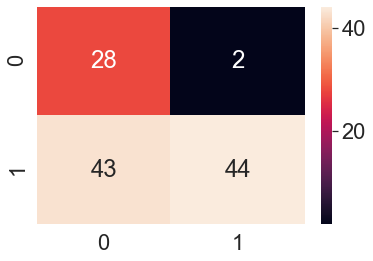

<Figure size 1800x1800 with 0 Axes>

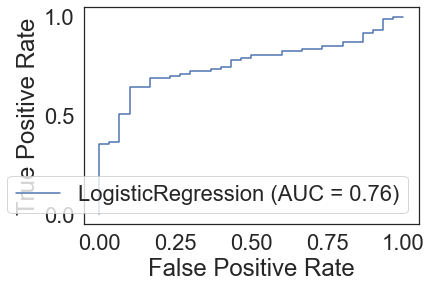

In [26]:
X_train2 = train_up.drop(columns='Liver_Patient')
y_train2 = train_up['Liver_Patient']
X_test2 = df_test.drop(columns='Liver_Patient')
y_test2 = df_test['Liver_Patient']
logit = LogisticRegression()
logit.fit(X_train2,y_train2)
y_pred2 = logit.predict(X_test2)
print("The Testing Balanced accuracy score is : ",balanced_accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))
sns.heatmap(confusion_matrix(y_test2,y_pred2),annot=True)
plt.figure(figsize=(25,25))
plot_roc_curve(logit, X_test2,y_test2)

The Testing Balanced accuracy score is :  0.5862068965517241
              precision    recall  f1-score   support

           0       0.42      0.33      0.37        30
           1       0.78      0.84      0.81        87

    accuracy                           0.71       117
   macro avg       0.60      0.59      0.59       117
weighted avg       0.69      0.71      0.70       117



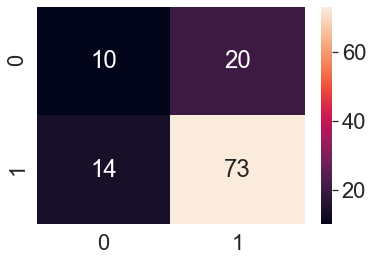

<Figure size 1800x1800 with 0 Axes>

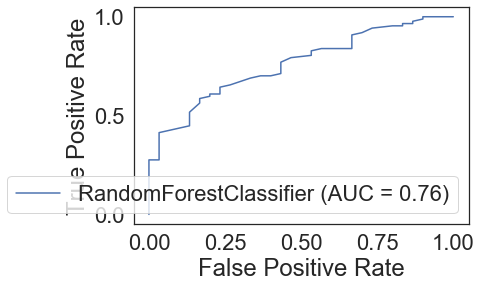

In [27]:
rf= RandomForestClassifier()
rf.fit(X_train2,y_train2)
y_pred2 = rf.predict(X_test2)
print("The Testing Balanced accuracy score is : ",balanced_accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))
sns.heatmap(confusion_matrix(y_test2,y_pred2),annot=True)
plt.figure(figsize=(25,25))
plot_roc_curve(rf, X_test2,y_test2)

**Tried modelling with the upsampled data to tune the hyperparameters. The results were poor and gave a low recall and BER.**

### Spot Checking

In [28]:
def spt_chk(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, cv= 5, scoring = 'balanced_accuracy').mean()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print("Training Balanced Error Rate : ", 1-balanced_accuracy_score(y_train,y_train_pred))
    print("Cross Validation Balanced Error Rate : ",1-cv_score)
    print("Testing dataset results : \n")
    test_ber = 1-balanced_accuracy_score(y_test,y_test_pred)
    print("Testing Balanced Error Rate : ", test_ber)
    print("Classification Report :\n", classification_report(y_test,y_test_pred))
    print("Confusion Matrix :\n")
    plot_roc_curve(model, X_test,y_test)
    plt.subplots()[1].xaxis.tick_top()
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
    plt.show()
    
    return cv_score,test_ber

In [29]:
models = dict()
models['Logistic'] = LogisticRegression(class_weight='balanced')
models['NB']= GaussianNB()
models['MLP'] = MLPClassifier()
models['SVC'] = SVC(class_weight='balanced')
models['KNN'] = KNeighborsClassifier()
models['DT'] = DecisionTreeClassifier(class_weight='balanced')
models['RF'] = RandomForestClassifier(class_weight='balanced')

The Classifier is :  Logistic
Training Balanced Error Rate :  0.3237146921357448
Cross Validation Balanced Error Rate :  0.3653666399935057
Testing dataset results : 

Testing Balanced Error Rate :  0.25425230333097093
Classification Report :
               precision    recall  f1-score   support

           0       0.49      0.85      0.62        34
           1       0.91      0.64      0.75        83

    accuracy                           0.70       117
   macro avg       0.70      0.75      0.69       117
weighted avg       0.79      0.70      0.71       117

Confusion Matrix :



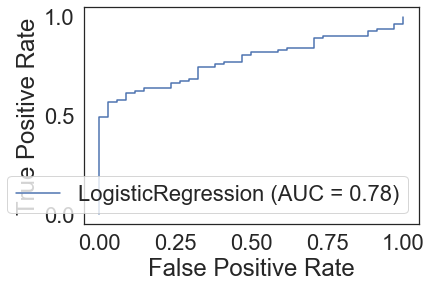

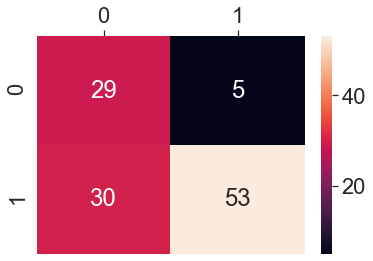

The Classifier is :  NB
Training Balanced Error Rate :  0.3296303822619613
Cross Validation Balanced Error Rate :  0.3475487751607155
Testing dataset results : 

Testing Balanced Error Rate :  0.309177888022679
Classification Report :
               precision    recall  f1-score   support

           0       0.41      0.91      0.57        34
           1       0.93      0.47      0.62        83

    accuracy                           0.60       117
   macro avg       0.67      0.69      0.60       117
weighted avg       0.78      0.60      0.61       117

Confusion Matrix :



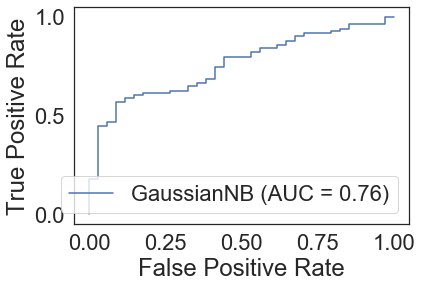

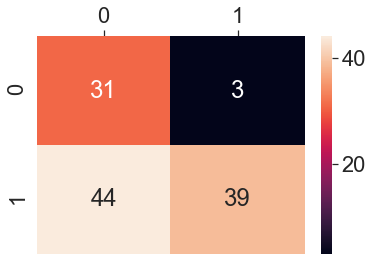

The Classifier is :  MLP
Training Balanced Error Rate :  0.36085709769920293
Cross Validation Balanced Error Rate :  0.4741751614885944
Testing dataset results : 

Testing Balanced Error Rate :  0.39847625797306874
Classification Report :
               precision    recall  f1-score   support

           0       0.52      0.32      0.40        34
           1       0.76      0.88      0.82        83

    accuracy                           0.72       117
   macro avg       0.64      0.60      0.61       117
weighted avg       0.69      0.72      0.69       117

Confusion Matrix :



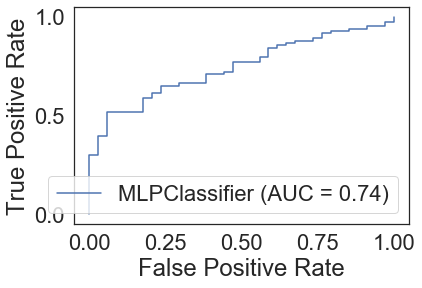

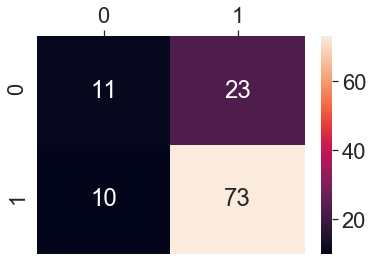

The Classifier is :  SVC
Training Balanced Error Rate :  0.2816049131838605
Cross Validation Balanced Error Rate :  0.33601572556796433
Testing dataset results : 

Testing Balanced Error Rate :  0.3405386250885897
Classification Report :
               precision    recall  f1-score   support

           0       0.41      0.76      0.54        34
           1       0.85      0.55      0.67        83

    accuracy                           0.62       117
   macro avg       0.63      0.66      0.60       117
weighted avg       0.72      0.62      0.63       117

Confusion Matrix :



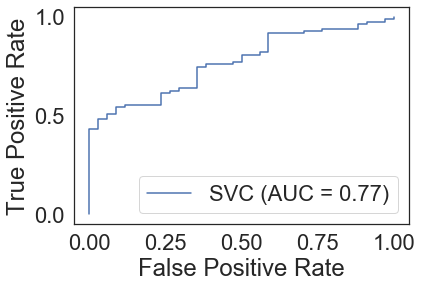

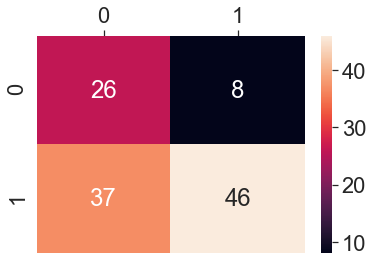

The Classifier is :  KNN
Training Balanced Error Rate :  0.3157330262593421
Cross Validation Balanced Error Rate :  0.47462957164449704
Testing dataset results : 

Testing Balanced Error Rate :  0.401842664776754
Classification Report :
               precision    recall  f1-score   support

           0       0.48      0.35      0.41        34
           1       0.76      0.84      0.80        83

    accuracy                           0.70       117
   macro avg       0.62      0.60      0.60       117
weighted avg       0.68      0.70      0.69       117

Confusion Matrix :



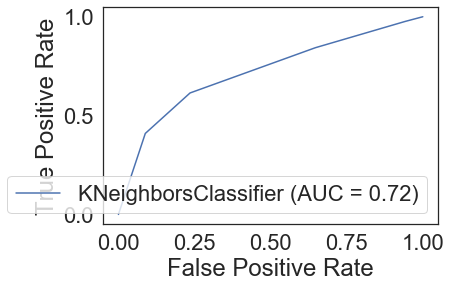

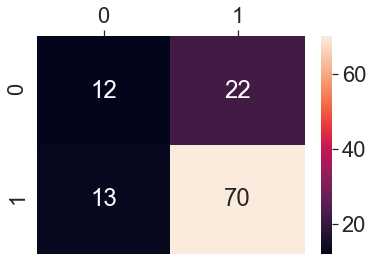

The Classifier is :  DT
Training Balanced Error Rate :  0.0
Cross Validation Balanced Error Rate :  0.3913640809163197
Testing dataset results : 

Testing Balanced Error Rate :  0.3483345145287031
Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.41      0.49        34
           1       0.79      0.89      0.84        83

    accuracy                           0.75       117
   macro avg       0.70      0.65      0.66       117
weighted avg       0.74      0.75      0.74       117

Confusion Matrix :



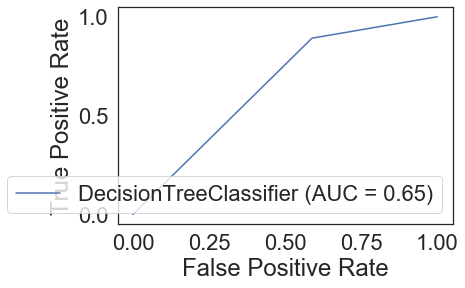

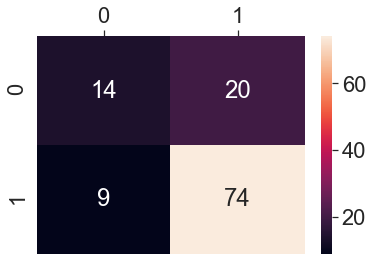

The Classifier is :  RF
Training Balanced Error Rate :  0.0
Cross Validation Balanced Error Rate :  0.43839794809944066
Testing dataset results : 

Testing Balanced Error Rate :  0.42186392629340896
Classification Report :
               precision    recall  f1-score   support

           0       0.50      0.26      0.35        34
           1       0.75      0.89      0.81        83

    accuracy                           0.71       117
   macro avg       0.62      0.58      0.58       117
weighted avg       0.68      0.71      0.68       117

Confusion Matrix :



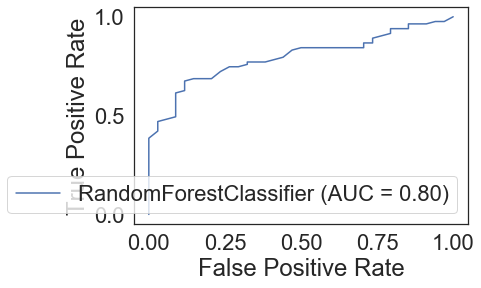

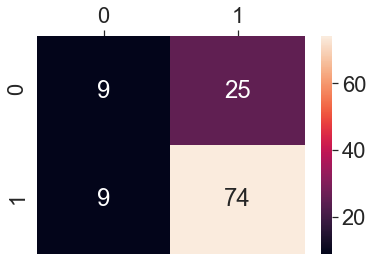

In [30]:
results = []
names = []
for name, model in models.items():
    print('The Classifier is : ',name)
    names.append(name)
    results.append(spt_chk(model,X_train,y_train,X_test,y_test))

In [31]:
#Results of the models in Spotcheck
cv_bal_acc = [results[i][0] for i in range(len(results))]
test_ber = [results[i][1] for i in range(len(results))]
model_cv_results = pd.DataFrame()
model_cv_results['Model'] = names
model_cv_results['CV_Balanced_Accuracy'] = cv_bal_acc
model_cv_results['Test_Balanced_Error_Rate'] = test_ber
model_cv_results

,Model,CV_Balanced_Accuracy,Test_Balanced_Error_Rate
0,Logistic,0.634633,0.254252
1,NB,0.652451,0.309178
2,MLP,0.525825,0.398476
3,SVC,0.663984,0.340539
4,KNN,0.525370,0.401843
5,DT,0.608636,0.348335
6,RF,0.561602,0.421864


## Trying XGBoost

In [32]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train2, label=y_train2)
dtest = xgb.DMatrix(X_test2, label=y_test2)

param = {
    'max_depth': 10,  # the maximum depth of each tree
    'eta': 0.001,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 1000  # the number of training iterations

bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

# extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Numpy array precision:", balanced_accuracy_score(y_test, best_preds))

[17:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Numpy array precision: 0.5552799433026223


Testing balanced accuracy is :  0.5552799433026223
Classification Report :
               precision    recall  f1-score   support

           0       0.36      0.41      0.38        34
           1       0.74      0.70      0.72        83

    accuracy                           0.62       117
   macro avg       0.55      0.56      0.55       117
weighted avg       0.63      0.62      0.62       117

Confusion Matrix :



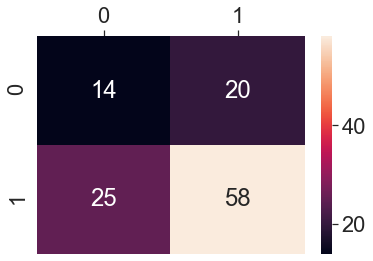

In [33]:
print("Testing balanced accuracy is : ",balanced_accuracy_score(y_test,best_preds))
print("Classification Report :\n", classification_report(y_test,best_preds))
print("Confusion Matrix :\n")
#plot_roc_curve(model, X_test,y_test)
plt.subplots()[1].xaxis.tick_top()
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, fmt='d')
plt.show()

**From the above results, it was found that upsampled data did not perform well so models with Balanced Class weight were used which performed better. Deciding to tune the hyperparameters of Logistic and Random Forest then select the best model.**

## Tuning hyperparameter with Grid Search

### Logistic Regression

In [34]:
params_lr = {'penalty':['l1','l2','elasticnet'],'C':[1,10,20],'max_iter':[50,100,150],'l1_ratio':[0.2,0.6,0.8]}

In [35]:
gs_lr = GridSearchCV(LogisticRegression(class_weight='balanced',random_state=42),param_grid = params_lr, cv = 5, scoring = 'recall')
gs_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [1, 10, 20], 'l1_ratio': [0.2, 0.6, 0.8],
                         'max_iter': [50, 100, 150],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall')

In [36]:
print('The best score is: ',gs_lr.best_score_)
print('The best parmaters are: ',gs_lr.best_params_)

The best score is:  0.531659882406151
The best parmaters are:  {'C': 1, 'l1_ratio': 0.2, 'max_iter': 50, 'penalty': 'l2'}


Testing balanced accuracy is :  0.7457476966690291
Classification Report :
               precision    recall  f1-score   support

           0       0.49      0.85      0.62        34
           1       0.91      0.64      0.75        83

    accuracy                           0.70       117
   macro avg       0.70      0.75      0.69       117
weighted avg       0.79      0.70      0.71       117

Confusion Matrix :



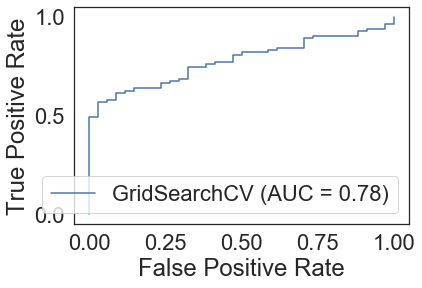

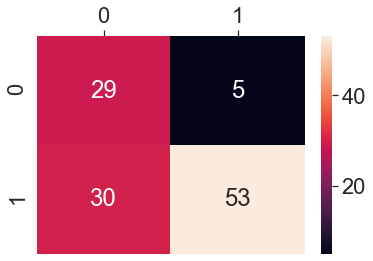

In [37]:
y_pred = gs_lr.predict(X_test)
print("Testing balanced accuracy is : ",balanced_accuracy_score(y_test,y_pred))
print("Classification Report :\n", classification_report(y_test,y_pred))
print("Confusion Matrix :\n")
plot_roc_curve(gs_lr, X_test,y_test)
plt.subplots()[1].xaxis.tick_top()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

### RandomForest

In [38]:
params_rf = {'n_estimators':[100,200,300], 'criterion':['gini','entropy'], 'max_depth': [5,10,15]}

In [39]:
gcv = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=42),param_grid = params_rf, cv = 5, scoring = 'balanced_accuracy')
gcv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [40]:
print('The best score is: ',gcv.best_score_)
print('The best parmaters are: ',gcv.best_params_)

The best score is:  0.6474293257875348
The best parmaters are:  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}


Testing balanced accuracy is :  0.7351169383416017
Classification Report :
               precision    recall  f1-score   support

           0       0.53      0.74      0.62        34
           1       0.87      0.73      0.80        83

    accuracy                           0.74       117
   macro avg       0.70      0.74      0.71       117
weighted avg       0.77      0.74      0.75       117

Confusion Matrix :



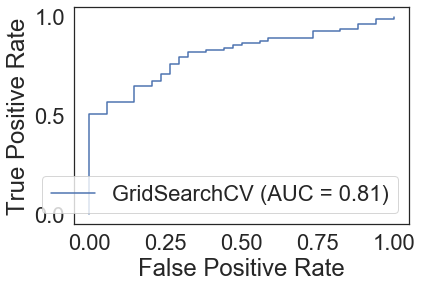

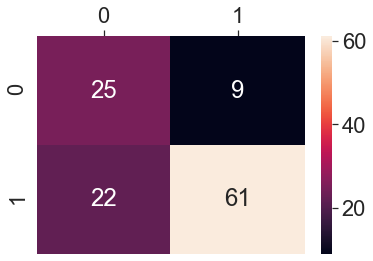

In [41]:
y_pred = gcv.predict(X_test)
print("Testing balanced accuracy is : ",balanced_accuracy_score(y_test,y_pred))
print("Classification Report :\n", classification_report(y_test,y_pred))
print("Confusion Matrix :\n")
plot_roc_curve(gcv, X_test,y_test)
plt.subplots()[1].xaxis.tick_top()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [42]:
gcv_results = pd.DataFrame(y_test.values.reshape(-1,1),columns=['True'],index=y_test.index)
gcv_results['Predicted'] = y_pred.reshape(-1,1)
gcv_results['Prob_0'] = gcv.predict_proba(X_test)[:,0]
gcv_results['Prob_1'] = gcv.predict_proba(X_test)[:,1]
gcv_results

,True,Predicted,Prob_0,Prob_1
70,1,0,0.685308,0.314692
61,1,0,0.593099,0.406901
252,0,1,0.360096,0.639904
136,1,1,0.170933,0.829067
396,1,0,0.512243,0.487757
...,...,...,...,...
195,1,1,0.200171,0.799829
276,0,0,0.640223,0.359777
549,1,1,0.262236,0.737764
444,0,0,0.586078,0.413922


In [43]:
gcv_results[((gcv_results.Prob_0>0.7) | (gcv_results.Prob_1>0.7)) & (gcv_results['True']!=gcv_results.Predicted)]

,True,Predicted,Prob_0,Prob_1
455,1,0,0.749133,0.250867
432,1,0,0.709689,0.290311


## RESULT
**By looking at the results of the hyperparameter tuning, Random Forest can be selected as the best classifier. Because:**<br>
1. **The Balanced Accuracy pf 0.73 is almost similar to that of Logistic Regression 0.74 but the recall for RF is 0.73 which is higher higher than that of Logistic Regression's 0.64.**
2. **The AUC for RF is higher than AUC of Logistic Regression. AUC for RF is 0.81.**
3. **Random Forest is robust algorithm which is not impacted data preprocessing like scaling and enccoding.**
4. **There are only two misclassifications if the prediction probability is higher than 0.7**